# Traces visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [2]:
project_dir = os.getenv("MASTER_THESIS_RESULTS")

## Test dataset - Wang2021

In [3]:
raw_data_dir = os.path.join(os.getenv("MASTERTHESISTOP"), "datasets/last_round_aes/testing_data/testing_trace_15m")

In [4]:
d6_original_data = os.path.join(raw_data_dir, "d6_5k/original_data")
d7_original_data = os.path.join(raw_data_dir, "d7_5k/original_data")
d8_original_data = os.path.join(raw_data_dir, "d8_5k/original_data")
d9_original_data = os.path.join(raw_data_dir, "d9_5k/original_data")
d10_original_data = os.path.join(raw_data_dir, "d10_5k/original_data")
d6_data = os.path.join(project_dir, "datasets/test_traces/Wang_2021/office_corridor/15m/device_6/data")
d7_data = os.path.join(project_dir, "datasets/test_traces/Wang_2021/office_corridor/15m/device_7/data")
d8_data = os.path.join(project_dir, "datasets/test_traces/Wang_2021/office_corridor/15m/device_8/data")
d9_data = os.path.join(project_dir, "datasets/test_traces/Wang_2021/office_corridor/15m/device_9/data")
d10_data = os.path.join(project_dir, "datasets/test_traces/Wang_2021/office_corridor/15m/device_10/data")

### Device 6

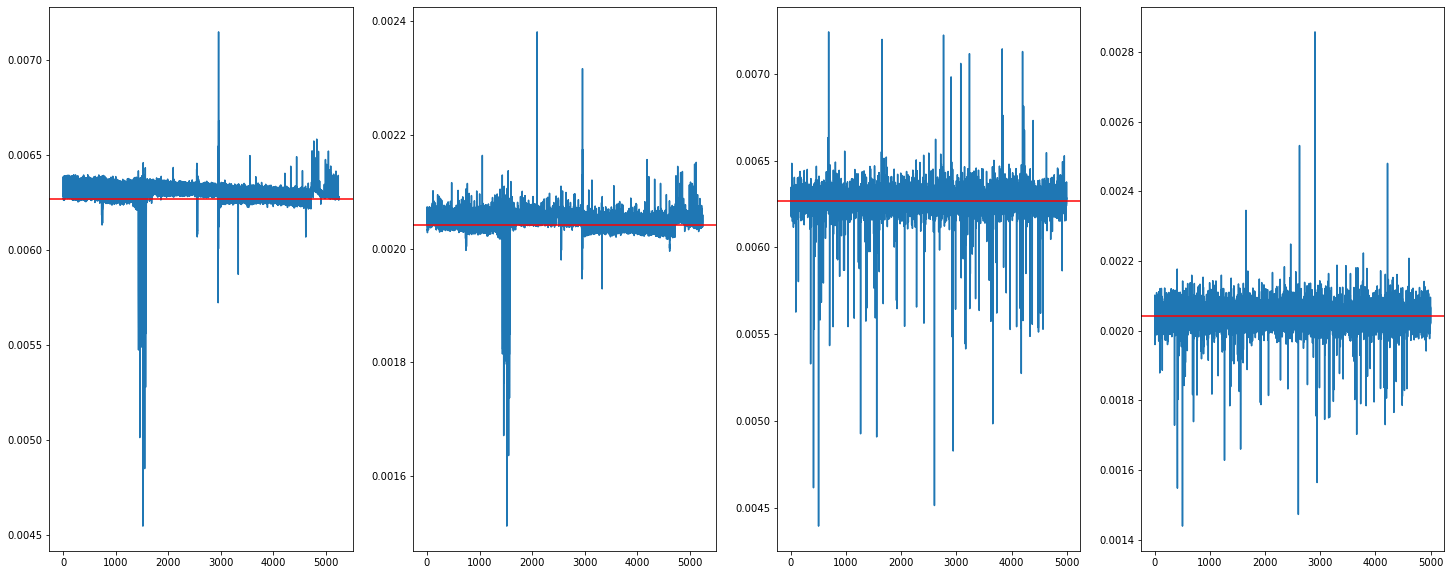

In [5]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d6_original_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d6_original_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d6_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 7

all__560.npy


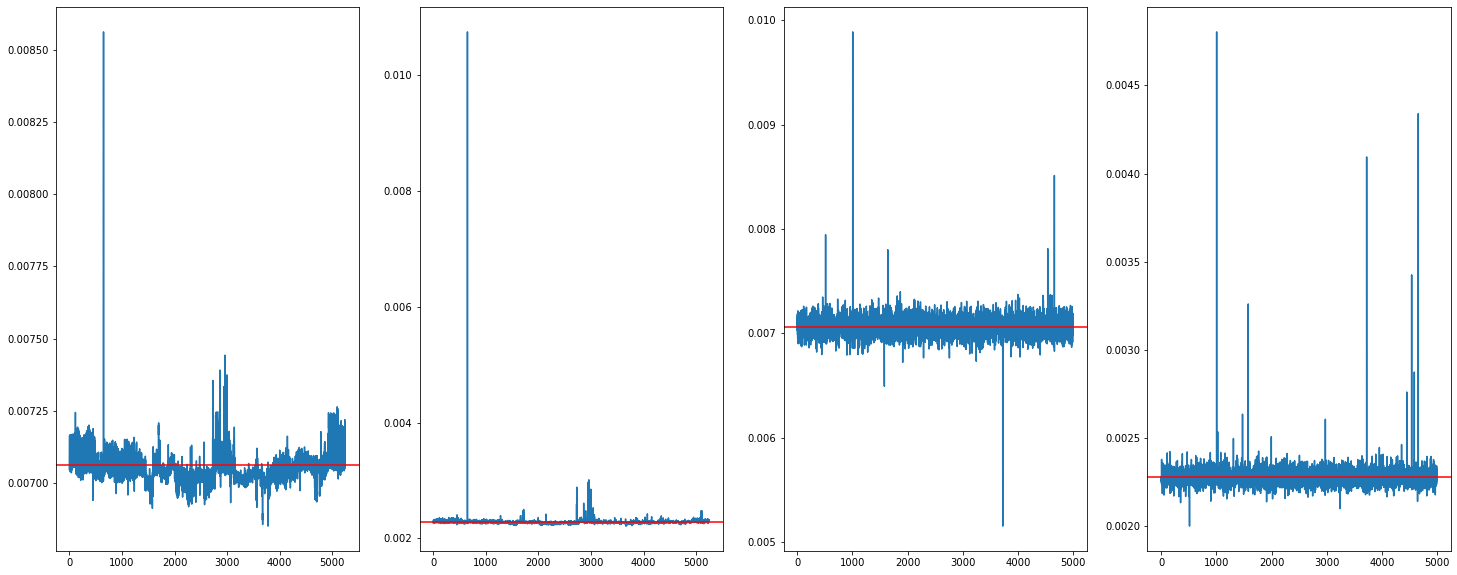

In [6]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d7_original_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d7_original_data, i))
    if len(trace) == 0:
        print(i)
        continue
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d7_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 8

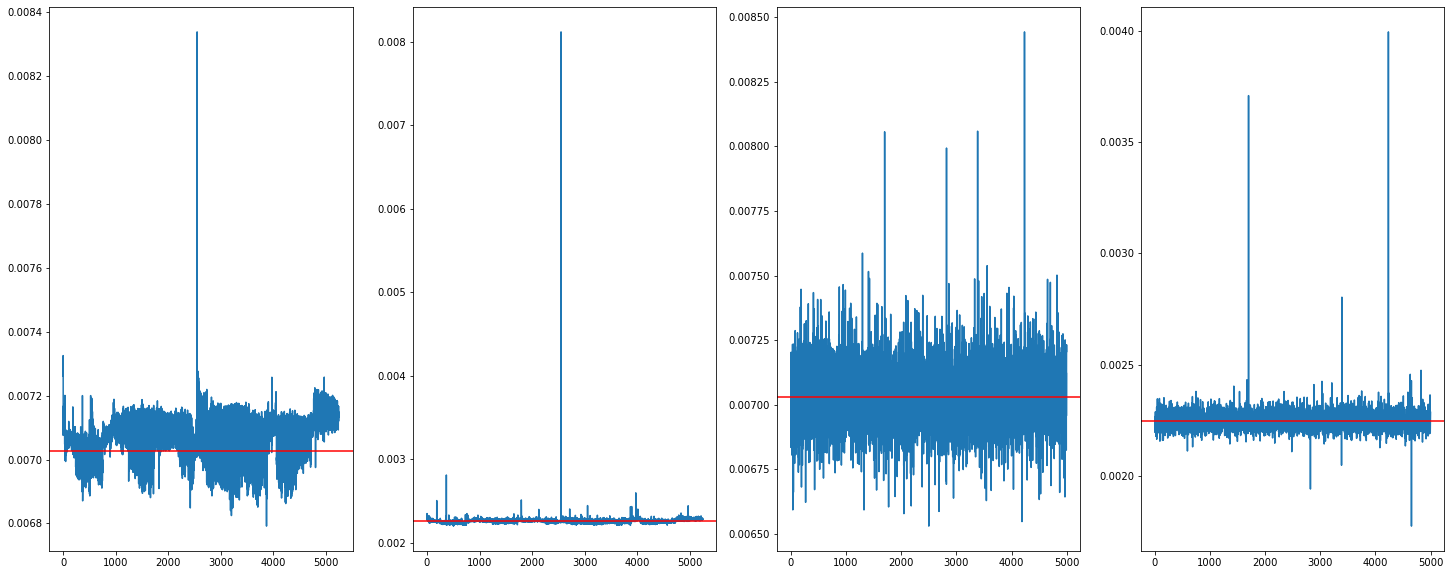

In [7]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d8_original_data)) if x[0:3] == "all"]
for i in all__traces:
    if i != "all__3962.npy":
        trace = np.load(os.path.join(d8_original_data, i))
        all_avg.append(trace.mean())
        all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d8_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 9

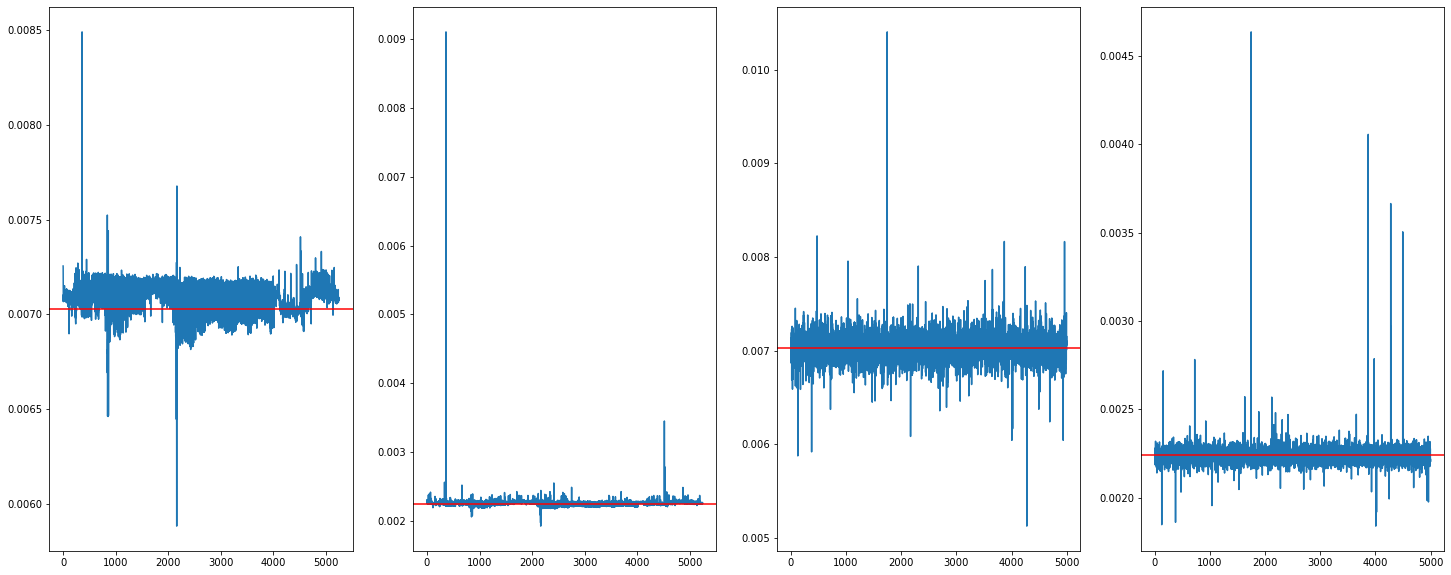

In [8]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d9_original_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d9_original_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d9_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 10

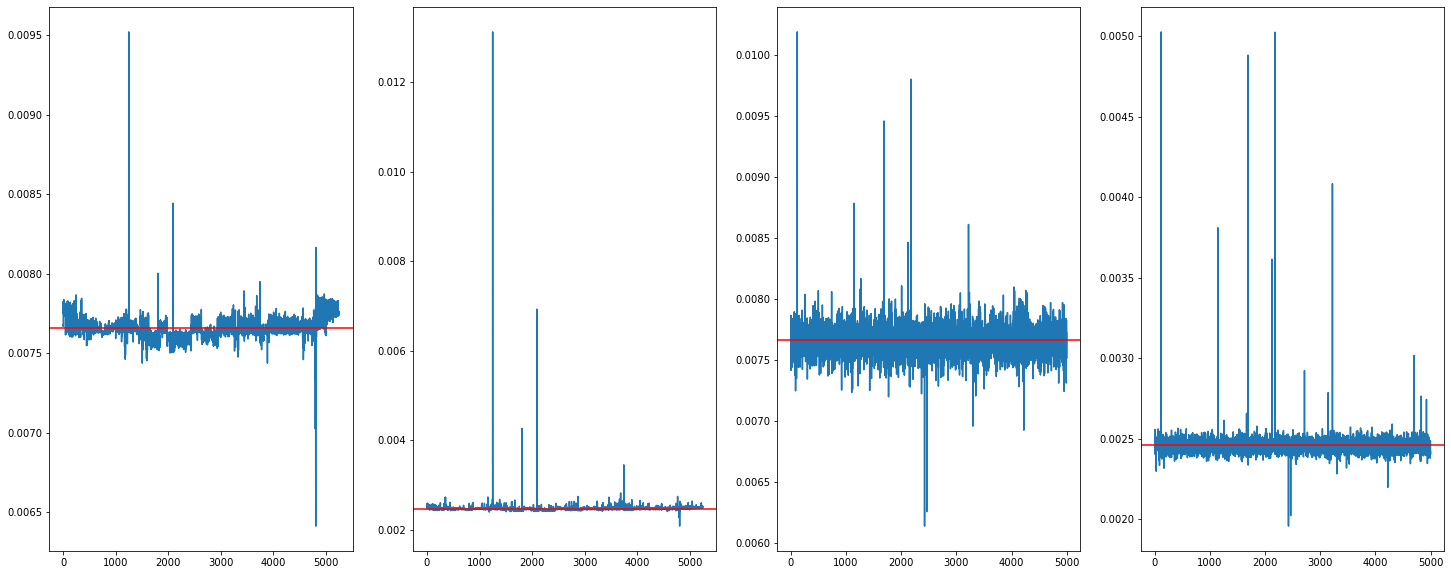

In [9]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d10_original_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d10_original_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d10_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

## Zedigh 2021

In [12]:
raw_data_dir = os.path.join(os.getenv("MASTERTHESISTOP"), "datasets/last_round_aes/Zedigh_2021/office_corridor/")

d9_25m_o_data = os.path.join(raw_data_dir, "2.5m/device_9")
d9_25m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/2m/device_9/data")
d10_25m_o_data = os.path.join(raw_data_dir, "2.5m/device_10")
d10_25m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/2m/device_10/data")

d8_5m_o_data = os.path.join(raw_data_dir, "5m/device_8")
d8_5m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/5m/device_8/data")
d9_5m_o_data = os.path.join(raw_data_dir, "5m/device_9")
d9_5m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/5m/device_9/data")
d10_5m_o_data = os.path.join(raw_data_dir, "5m/device_10")
d10_5m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/5m/device_10/data")

d8_10m_o_data = os.path.join(raw_data_dir, "10m/device_8")
d8_10m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/10m/device_8/data")
d9_10m_o_data = os.path.join(raw_data_dir, "10m/device_9")
d9_10m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/10m/device_9/data")
d10_10m_o_data = os.path.join(raw_data_dir, "10m/device_10")
d10_10m_data = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/10m/device_10/data")

## 2.5m

### Device 9

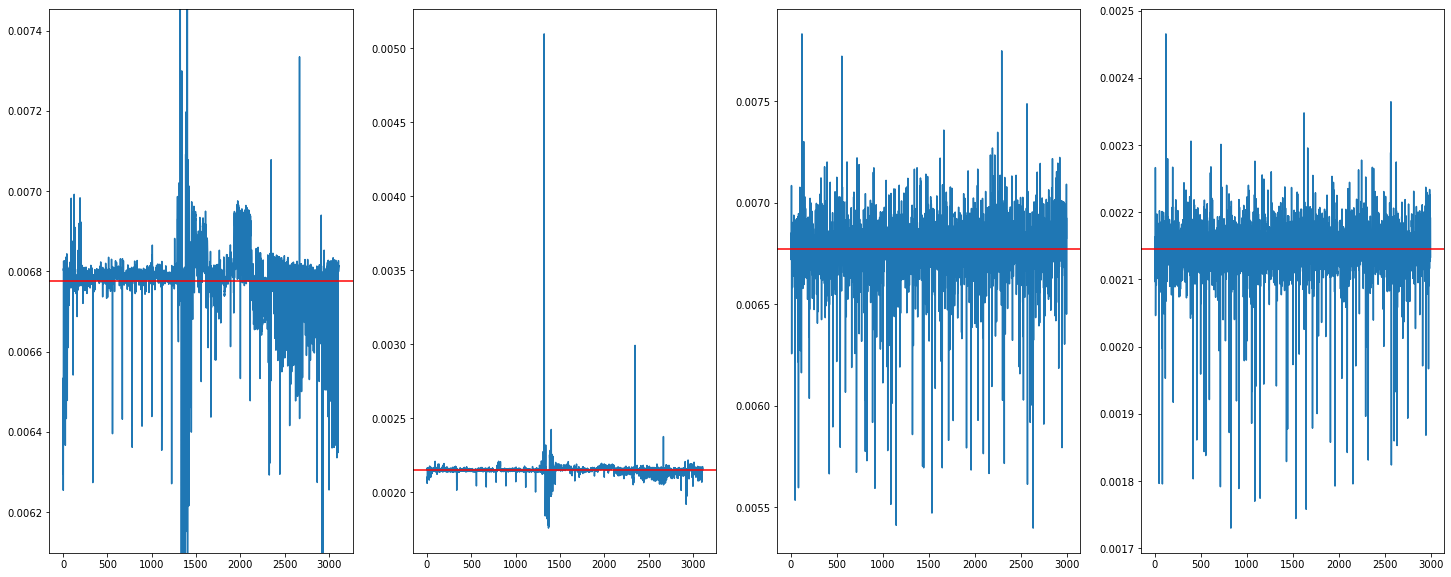

In [13]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d9_25m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d9_25m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d9_25m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 10

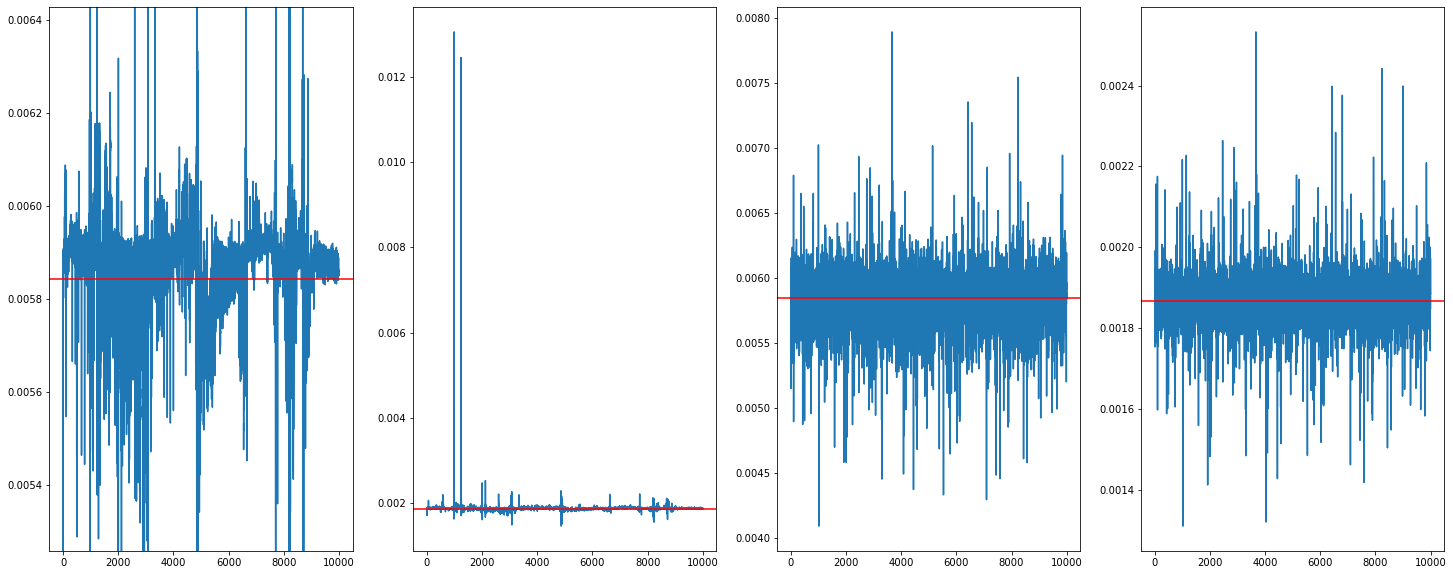

In [14]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d10_25m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d10_25m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d10_25m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

## 5m

### Device 8

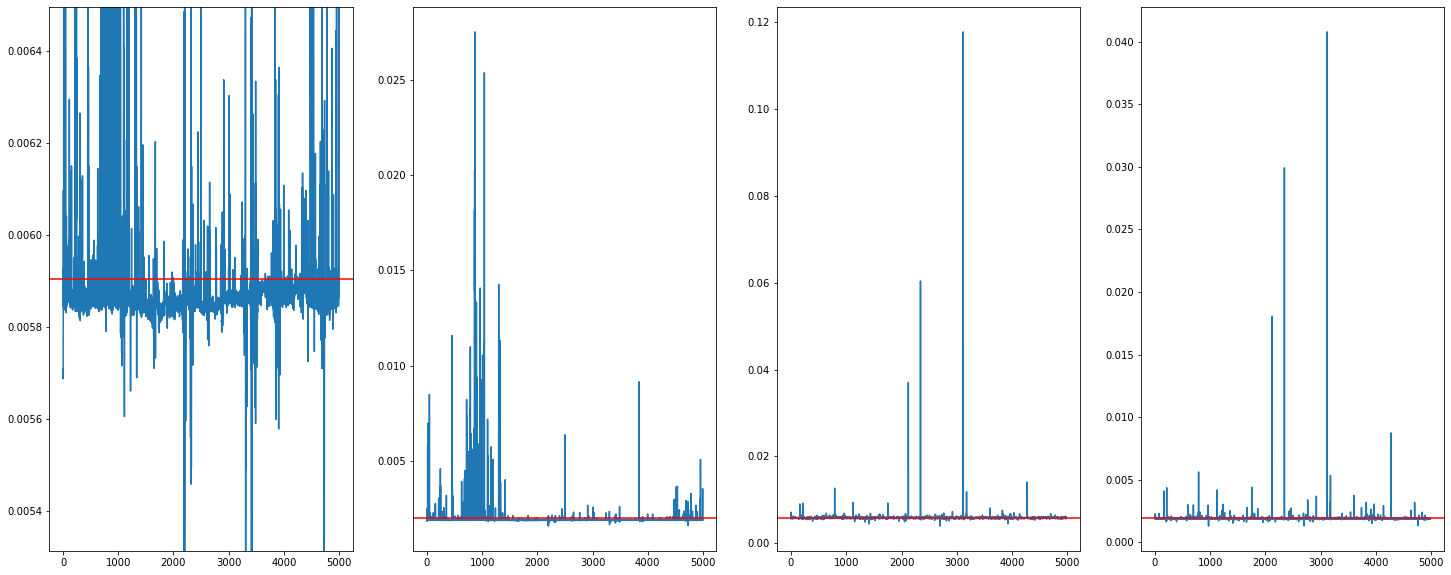

In [15]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d8_5m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d8_5m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d8_5m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 9

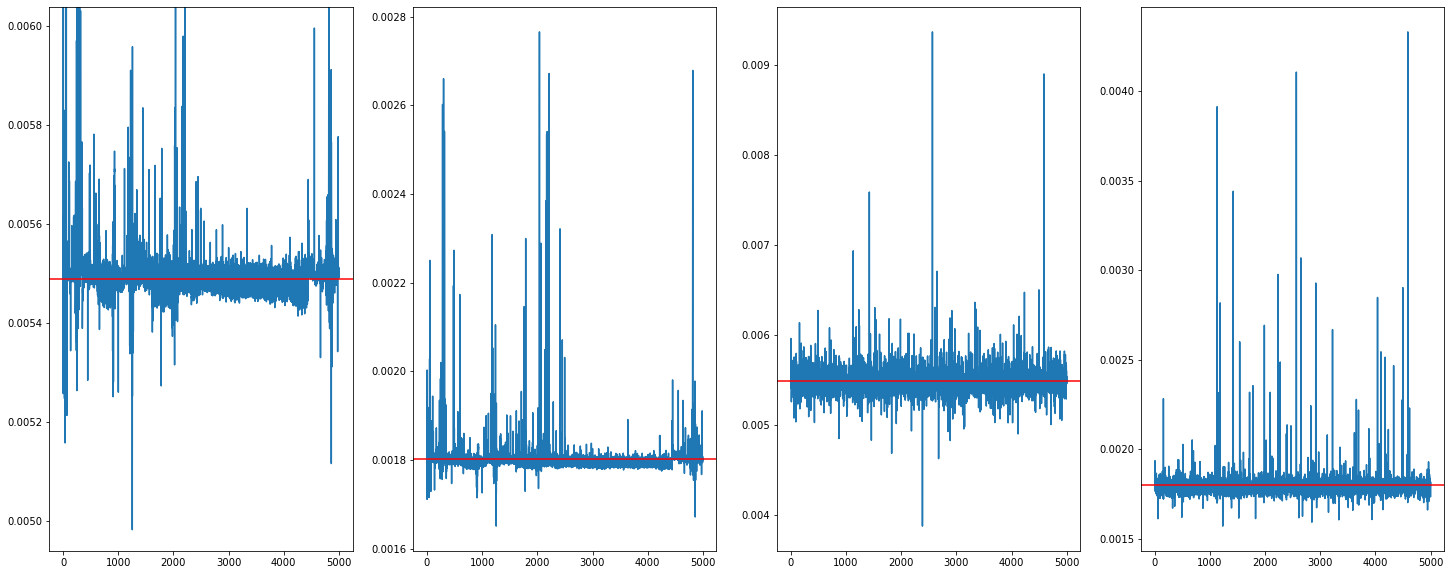

In [16]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d9_5m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d9_5m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d9_5m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 10

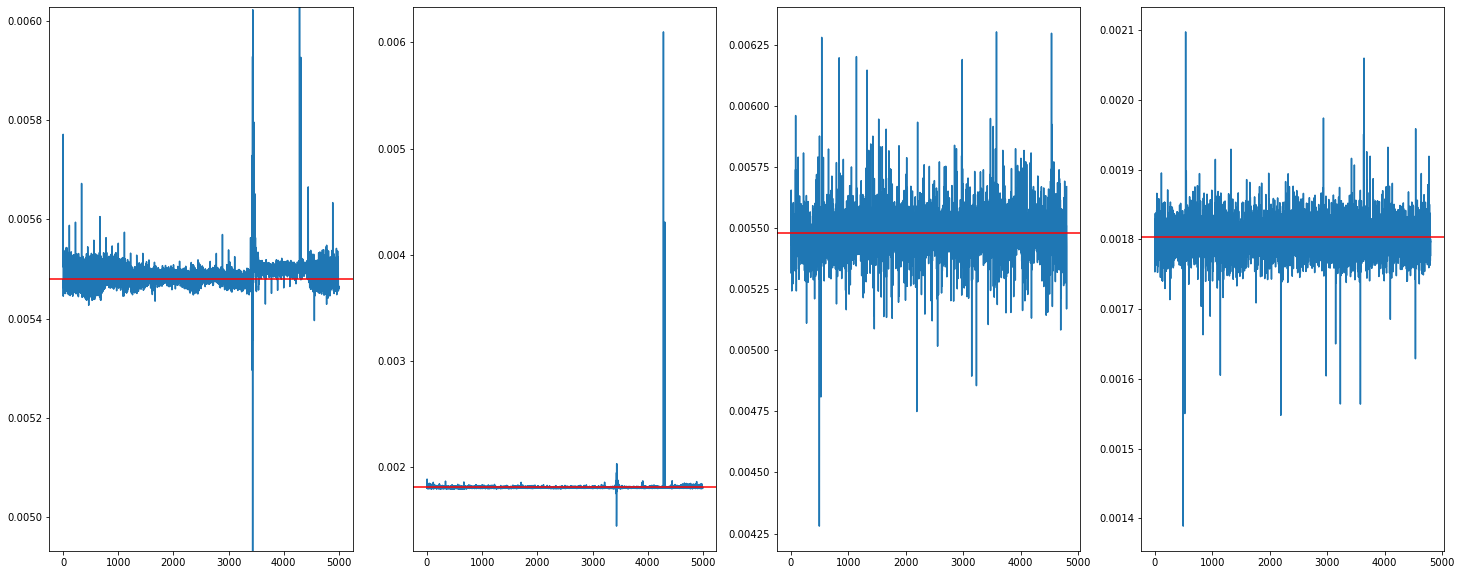

In [17]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d10_5m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d10_5m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d10_5m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

## 10m

### Device 8

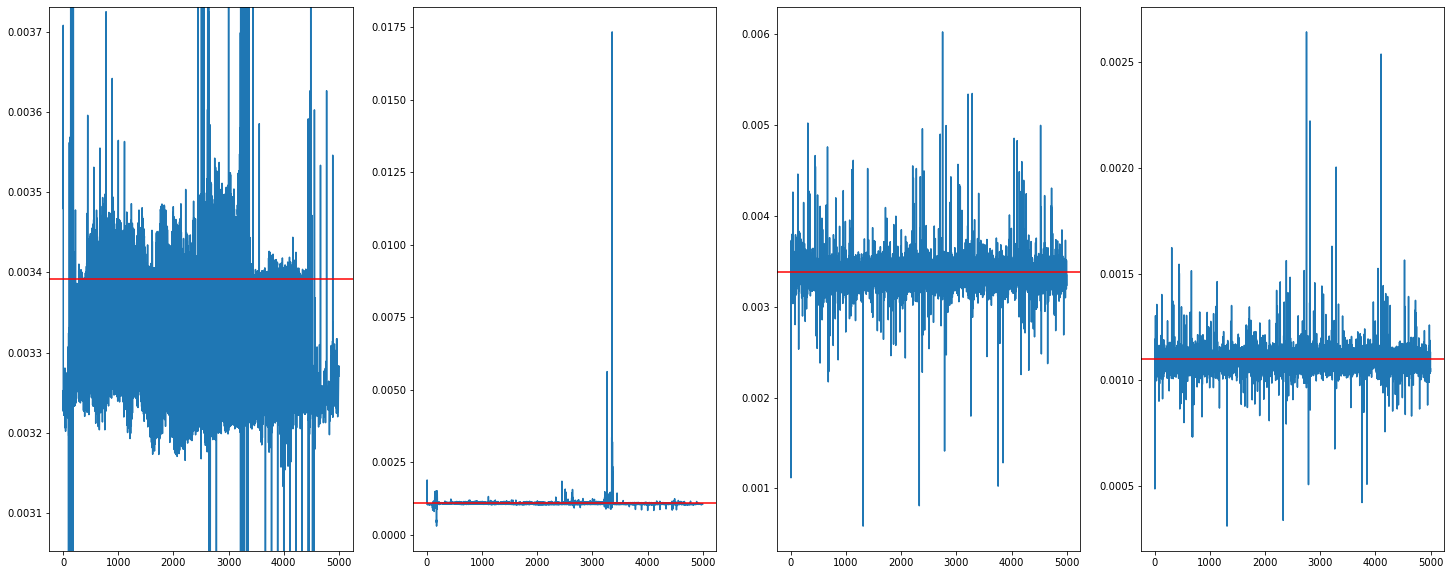

In [18]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d8_10m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d8_10m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d8_10m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 9

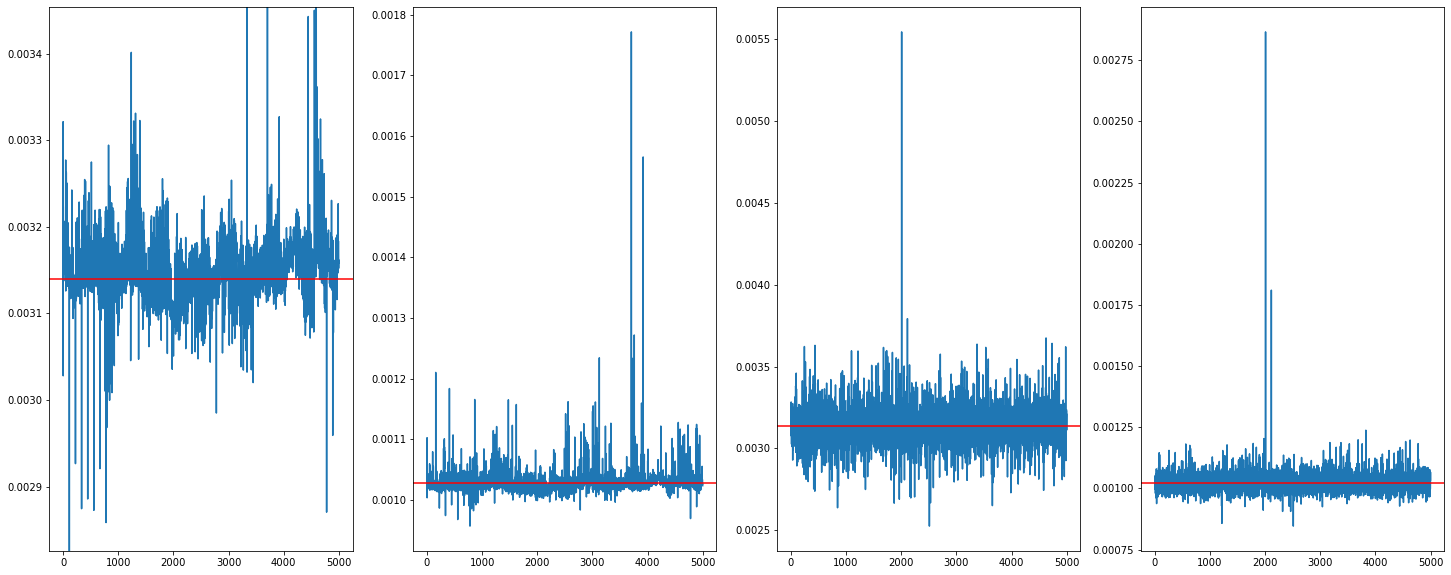

In [19]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d9_10m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d9_10m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d9_10m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()

### Device 10

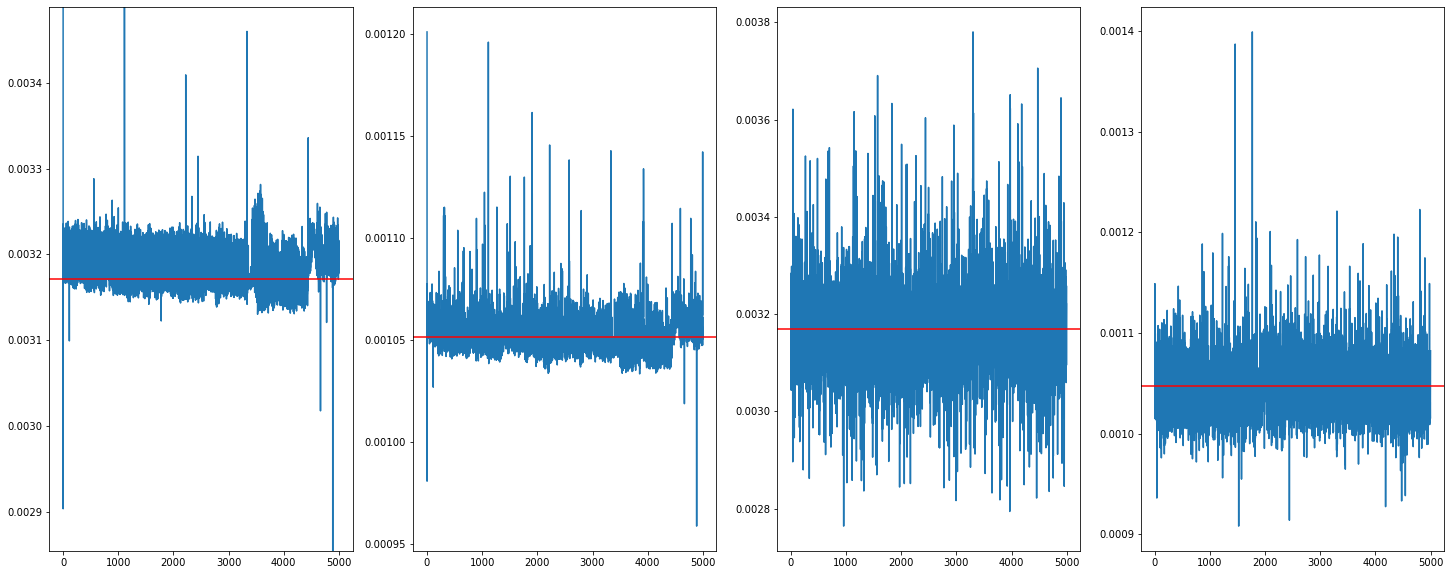

In [20]:
all_avg = []
all_std = []
all__traces = [x for x in np.array(os.listdir(d10_10m_o_data)) if x[0:3] == "all"]
for i in all__traces:
    trace = np.load(os.path.join(d10_10m_o_data, i))
    all_avg.append(trace.mean())
    all_std.append(trace.std())
all_avg = np.array(all_avg)
all_std = np.array(all_std)

data = np.load(os.path.join(d10_10m_data, "traces.npy"))
data_mean = []
data_std = []
for i in range(len(data)):
    trace = data[i]
    data_mean.append(trace.mean())
    data_std.append(trace.std())
data_mean = np.array(data_mean)
data_std = np.array(data_std)

plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.plot(all_avg)
plt.axhline(y=all_avg.mean(), color='r', linestyle='-')
plt.ylim(all_avg.mean()*0.9,all_avg.mean()*1.1)
plt.subplot(1,4,2)
plt.plot(all_std)
plt.axhline(y=all_std.mean(), color='r', linestyle='-')
plt.subplot(1,4,3)
plt.plot(data_mean)
plt.axhline(y=data_mean.mean(), color='r', linestyle='-')
plt.subplot(1,4,4)
plt.plot(data_std)
plt.axhline(y=data_std.mean(), color='r', linestyle='-')
plt.show()